In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [87]:
df = pd.read_csv("~/Downloads/FinalProjData.csv")

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df['2019 Food Insecurity Rate'].values.reshape(-1,1)
y = df['2019 Food Insecurity Rate'].values

features = ['Unemployment Rate', '% of Disabled Workers', 'Cost Per Meal', '% of All in Poverty', 'Log MEDHHINC', '% of adults less than HS Diploma 2015-19', '2019 Food Insecurity Rate']

In [89]:
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('2019 Food Insecurity Rate',axis=1), df_train['2019 Food Insecurity Rate']
X_test, y_test = df_test.drop('2019 Food Insecurity Rate',axis=1), df_test['2019 Food Insecurity Rate']

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import rfpimp

In [104]:
rfreg = RandomForestRegressor(n_estimators=100, max_depth = 3)

In [105]:
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)

In [93]:
imp = rfpimp.importances(rfreg, X_test, y_test)

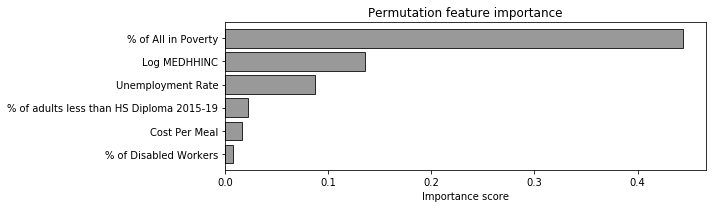

In [94]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()

In [69]:
r2_score(y_test, y_pred)

0.6754052601774401

In [70]:
mean_squared_error(y_test, y_pred)

0.000511576542693786

In [71]:
mean_squared_error(y_test, y_pred, squared=False)

0.02261805788952239

In [72]:
fn = df[['Unemployment_rate_2019', 'Proportion of Disabled Workers', '2019 Cost Per Meal', 'PCTPOVALL_2019', 'Log MEDHHINC_2019', 'Percent of adults with less than a high school diploma 2015-19']]

In [95]:
from sklearn import tree
from sklearn.tree import plot_tree

In [106]:
rfreg.estimators_[0].tree_.max_depth

3

In [107]:
fn = df[['Unemployment Rate', '% of Disabled Workers', 'Cost Per Meal', '% of All in Poverty', 'Log MEDHHINC', '% of adults less than HS Diploma 2015-19']]

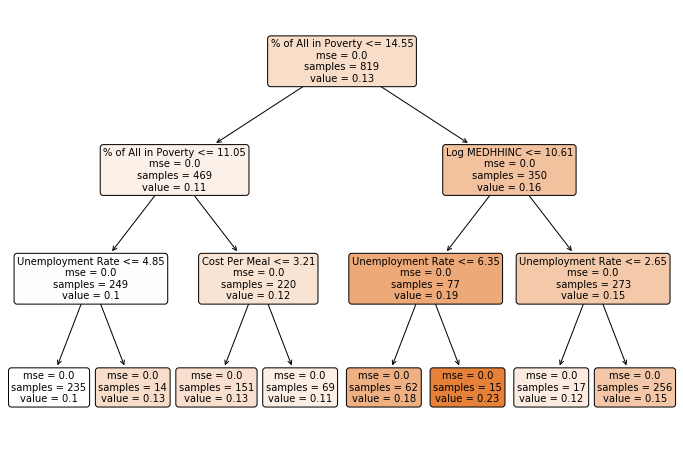

In [112]:
tree = rfreg.estimators_[0]

fig, _ = plt.subplots(figsize = (12,8))
ax = plot_tree(tree, feature_names = fn.columns, rounded = True,
          proportion = False, precision = 2, filled = True, fontsize = 10)

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit Gradient Boosting model
gbreg = GradientBoostingRegressor(n_estimators = 100,
                                  loss = 'ls',
                                  learning_rate = 0.05,
                                  random_state = 111,
                                  max_depth = 5)
gbreg.fit(X_train, y_train)

# Make predictions
y_pred_train = gbreg.predict(X_train)
y_pred_test = gbreg.predict(X_test)

# Evaluate model performance
print('Train RMSE: %.4f' % mean_squared_error(y_train, y_pred_train, squared=False))
print('Train R2: %.4f' % r2_score(y_train, y_pred_train))
print('Test RMSE: %.4f' % mean_squared_error(y_test, y_pred_test, squared=False))
print('Test R2: %.4f' % r2_score(y_test, y_pred_test))

Train RMSE: 0.0126
Train R2: 0.8873
Test RMSE: 0.0197
Test R2: 0.6978
